In [71]:
import matplotlib.pyplot as plt
import numpy as np

In [72]:
NUM_TRIALS = 5000
EPS = 0.5
BANDIT_PROBABILITIES = [0.1, 0.2, 0.35, 0.5, 0.65, 0.75, 0.9]

In [73]:
class Bandit:
    def __init__(self, p):
        # p: the win rate
        self.p = p
        self.p_estimate = 5.
        self.N = 1. # num samples collected so far

    def pull(self):
        # draw a 1 with probability p
        return np.random.random() < self.p

    def update(self, x):
        self.N += 1.
        self.p_estimate = ((self.N - 1)*self.p_estimate + x) / self.N

In [74]:
def experiment():
    bandits = [Bandit(p) for p in BANDIT_PROBABILITIES]

    rewards = np.zeros(NUM_TRIALS)
    for i in range(NUM_TRIALS):
        best_win = np.argmax([b.p_estimate for b in bandits])
        x = bandits[best_win].pull()
        rewards[i] = x
        bandits[best_win].update(x)


    # print mean estimates for each bandit
    for b in bandits:
        print("mean estimate:", b.p_estimate)

    # print total reward
    print("total reward earned:", rewards.sum())
    print("overall win rate:", rewards.sum() / NUM_TRIALS)
    print("num times selected each bandit:", [b.N for b in bandits])

    # plot the results
    cumulative_rewards = np.cumsum(rewards)
    win_rates = cumulative_rewards / (np.arange(NUM_TRIALS) + 1)
    plt.ylim([0, 1])
    plt.plot(win_rates)
    plt.plot(np.ones(NUM_TRIALS)*np.max(BANDIT_PROBABILITIES))
    plt.show()

mean estimate: 0.8333333333333334
mean estimate: 0.875
mean estimate: 0.8181818181818182
mean estimate: 0.8571428571428571
mean estimate: 0.8333333333333334
mean estimate: 0.875
mean estimate: 0.8952900747928043
total reward earned: 4445.0
overall win rate: 0.889
num times selected each bandit: [6.0, 8.0, 11.0, 7.0, 12.0, 16.0, 4947.0]


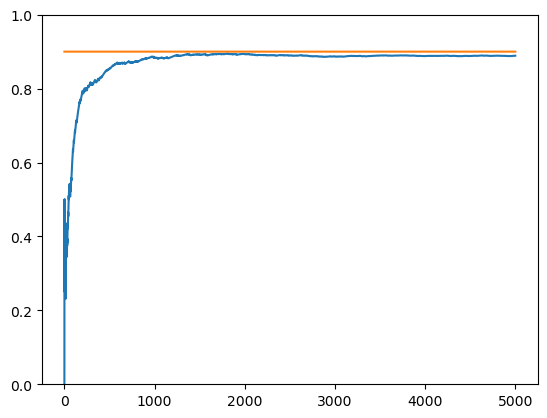

In [75]:
experiment()